In [1]:
#We need to import the necesary libraries for the practice
import pandas as pd
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from keras import optimizers
from numpy.random import seed
from numpy import array
from numpy import argmax
from keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

## Obtain the data
We get the data from csv file and put in a  dataframe

In [2]:
#put a seed of 10 for replicate the experiment with random values
seed(10)
# read the dataset of the assignment
def read_data_set(name):
    #delete the header
    return pd.read_csv(name, header=None).iloc[1: , :]

csv_file = 'assignment_ds.csv'
csv_file_test='test_ds.csv'

#we read the assignment and test csv
df=read_data_set(csv_file)
test_df=read_data_set(csv_file_test)

#show the first 10 rows
df[0:10]

,0,1,2,3,4,5,6
1,3453,0.000621,0.0773,17.08,Red,M,0
2,12098,689,7.01,0.02,Blue-white,A,3
3,2731,0.000437,0.0856,18.09,Red,M,0
4,37800,202900,6.86,-4.56,Blue,O,3
5,8570,0.00081,0.0097,14.2,Blue white,A,2
6,3605,126000,1124,-10.81,Red,M,5
7,8052,8.7,1.8,2.42,Whitish,A,3
8,3574,200000,89,-5.24,Red,M,4
9,8829,537493,1423,-10.73,White,A,5
10,3625,74000,876,-10.25,Red,M,5


## We combine them 
The reason is because we experiment that if we dont do this the one hot encoding will be wrong

In [3]:
#we concatenete the dataframes that means put one below other
extra_df=pd.concat([df, test_df])
#we reset the index
extra_df.index = range(extra_df.shape[0])
extra_df

,0,1,2,3,4,5,6
0,3453,0.000621,0.0773,17.08,Red,M,0
1,12098,689,7.01,0.02,Blue-white,A,3
2,2731,0.000437,0.0856,18.09,Red,M,0
3,37800,202900,6.86,-4.56,Blue,O,3
4,8570,0.00081,0.0097,14.2,Blue white,A,2
...,...,...,...,...,...,...,...
234,2935,0.00014,0.116,18.89,Red,M,NaN
235,3340,0.0038,0.24,13.07,Red,M,NaN
236,23095,347820,86,-5.905,Blue,O,NaN
237,3225,0.00076,0.121,19.63,Red,M,NaN


## We look the classifications by colors.

In [4]:
#we extract all the diferents types of color
extra_df.groupby(4).apply(list)

4
Blue                  [0, 1, 2, 3, 4, 5, 6]
Blue White            [0, 1, 2, 3, 4, 5, 6]
Blue white            [0, 1, 2, 3, 4, 5, 6]
Blue-White            [0, 1, 2, 3, 4, 5, 6]
Blue-white            [0, 1, 2, 3, 4, 5, 6]
Orange                [0, 1, 2, 3, 4, 5, 6]
Orange-Red            [0, 1, 2, 3, 4, 5, 6]
Pale yellow orange    [0, 1, 2, 3, 4, 5, 6]
Red                   [0, 1, 2, 3, 4, 5, 6]
White                 [0, 1, 2, 3, 4, 5, 6]
White-Yellow          [0, 1, 2, 3, 4, 5, 6]
Whitish               [0, 1, 2, 3, 4, 5, 6]
Yellowish             [0, 1, 2, 3, 4, 5, 6]
Yellowish White       [0, 1, 2, 3, 4, 5, 6]
white                 [0, 1, 2, 3, 4, 5, 6]
yellow-white          [0, 1, 2, 3, 4, 5, 6]
yellowish             [0, 1, 2, 3, 4, 5, 6]
dtype: object

## We clean the data  first converting the colors to lower case

In [5]:
# the column of the colors we converte it to lower case
def to_lower_case(datafra):
    return datafra[4].map(lambda x: x if type(x)!=str else x.lower())


extra_df[4] = to_lower_case(extra_df)

extra_df

,0,1,2,3,4,5,6
0,3453,0.000621,0.0773,17.08,red,M,0
1,12098,689,7.01,0.02,blue-white,A,3
2,2731,0.000437,0.0856,18.09,red,M,0
3,37800,202900,6.86,-4.56,blue,O,3
4,8570,0.00081,0.0097,14.2,blue white,A,2
...,...,...,...,...,...,...,...
234,2935,0.00014,0.116,18.89,red,M,NaN
235,3340,0.0038,0.24,13.07,red,M,NaN
236,23095,347820,86,-5.905,blue,O,NaN
237,3225,0.00076,0.121,19.63,red,M,NaN


## We replace the similar colors.

In [6]:
def change_colors(datafr):
    datafr[4] = datafr[4].replace(['blue-white'], 'blue white')
    datafr[4] = datafr[4].replace(['orange-red'], 'orange red')
    datafr[4] = datafr[4].replace(['yellow-white'], 'yellow white')
    datafr[4] = datafr[4].replace(['white-yellow'], 'white yellow')
    
# Change the colors bad writed
change_colors(extra_df)

extra_df

,0,1,2,3,4,5,6
0,3453,0.000621,0.0773,17.08,red,M,0
1,12098,689,7.01,0.02,blue white,A,3
2,2731,0.000437,0.0856,18.09,red,M,0
3,37800,202900,6.86,-4.56,blue,O,3
4,8570,0.00081,0.0097,14.2,blue white,A,2
...,...,...,...,...,...,...,...
234,2935,0.00014,0.116,18.89,red,M,NaN
235,3340,0.0038,0.24,13.07,red,M,NaN
236,23095,347820,86,-5.905,blue,O,NaN
237,3225,0.00076,0.121,19.63,red,M,NaN


## We Normalize the data

In [7]:
def normalize(datafr):
    # scale input data from numbers
    inputs_numbers = datafr[[0,1,2,3]]
    #transform it to a numpy array
    x = inputs_numbers.values 
    #use min max sclaer function
    min_max_scaler = MinMaxScaler()
    #apply min max
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)

inputs_numbers=normalize(extra_df)
inputs_numbers

,0,1,2,3
0,0.039778,6.369052e-10,3.536069e-05,0.906817
1,0.266914,8.111416e-04,3.593344e-03,0.373358
2,0.020809,4.202868e-10,3.962039e-05,0.938399
3,0.942198,2.388689e-01,3.516361e-03,0.230144
4,0.174220,8.594100e-10,6.671828e-07,0.816760
...,...,...,...,...
234,0.026169,7.063643e-11,5.522220e-05,0.963415
235,0.036809,4.379459e-09,1.188612e-04,0.781426
236,0.555845,4.094794e-01,4.413239e-02,0.188086
237,0.033788,8.005463e-10,5.778829e-05,0.986554


## We make the one hot encoding to the colors and the type of the spectrum

In [8]:

def one_hot_encode(dataframe):    
    #we use get dummies for hot encoding that is a function of pandas for Colors and type of spectrum
    one_hot_colors = pd.get_dummies(dataframe[[4]]).reset_index(drop=True)
    one_hot_spectrum = pd.get_dummies(dataframe[[5]]).reset_index(drop=True)
    return one_hot_colors,one_hot_spectrum

one_hot_colors,one_hot_spectrum=one_hot_encode(extra_df)
one_hot_spectrum

,5_A,5_B,5_F,5_G,5_K,5_M,5_O
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
234,0,0,0,0,0,1,0
235,0,0,0,0,0,1,0
236,0,0,0,0,0,0,1
237,0,0,0,0,0,1,0


## Transform target to one hot encode

In [9]:
#we use the label encoder to one hot encode the target classfication
target=df[[6]]
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)

#we rename his columns for adding them in the data frame
target = target.rename(columns = {
   0: 23,
   1: 24,
   2: 25,
   3: 26,
   4: 27,
   5: 28,
    
}, inplace = False)
target

C:\Users\Dani Camacho\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
195,0.0,0.0,1.0,0.0,0.0,0.0
196,0.0,0.0,1.0,0.0,0.0,0.0
197,0.0,0.0,0.0,1.0,0.0,0.0
198,0.0,0.0,0.0,1.0,0.0,0.0


## We move the target column to the last and join the rest

In [10]:
#We concatenate the dataframes to have the new dataframe with all clean data
new_df= pd.concat([inputs_numbers, one_hot_colors, one_hot_spectrum, target], axis=1,)

new_df

,0,1,2,3,4_blue,4_blue white,4_orange,4_orange red,4_pale yellow orange,4_red,...,5_G,5_K,5_M,5_O,23,24,25,26,27,28
0,0.039778,6.369052e-10,3.536069e-05,0.906817,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.266914,8.111416e-04,3.593344e-03,0.373358,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.020809,4.202868e-10,3.962039e-05,0.938399,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.942198,2.388689e-01,3.516361e-03,0.230144,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,0.174220,8.594100e-10,6.671828e-07,0.816760,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.026169,7.063643e-11,5.522220e-05,0.963415,0,0,0,0,0,1,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
235,0.036809,4.379459e-09,1.188612e-04,0.781426,0,0,0,0,0,1,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
236,0.555845,4.094794e-01,4.413239e-02,0.188086,1,0,0,0,0,0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
237,0.033788,8.005463e-10,5.778829e-05,0.986554,0,0,0,0,0,1,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


## We rename the columns with his index

In [11]:
#Here we change the name of the columns and put the number of his column instead
def rename_columns(datafram):    
    return datafram.rename(columns = {
        '4_blue': 4,
        '4_blue white':5,
        '4_orange':6,
        '4_orange red': 7,
        '4_pale yellow orange': 8,
        '4_red': 9,
        '4_white': 10,
        '4_white yellow': 11,
        '4_whitish': 12,
        '4_yellow white': 13,
        '4_yellowish':14,
        '4_yellowish white': 15,
        '5_A': 16,
        '5_B': 17,
        '5_F': 18,
        '5_G': 19,
        '5_K': 20,
        '5_M': 21,
        '5_O': 22    
    }, inplace = False)

df=rename_columns(new_df)
df


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.039778,6.369052e-10,3.536069e-05,0.906817,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.266914,8.111416e-04,3.593344e-03,0.373358,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.020809,4.202868e-10,3.962039e-05,0.938399,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.942198,2.388689e-01,3.516361e-03,0.230144,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,0.174220,8.594100e-10,6.671828e-07,0.816760,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.026169,7.063643e-11,5.522220e-05,0.963415,0,0,0,0,0,1,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
235,0.036809,4.379459e-09,1.188612e-04,0.781426,0,0,0,0,0,1,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
236,0.555845,4.094794e-01,4.413239e-02,0.188086,1,0,0,0,0,0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
237,0.033788,8.005463e-10,5.778829e-05,0.986554,0,0,0,0,0,1,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


## We separate the data in the testing part and the train
The reason that we did all the previous steps is because we get noticed that if we just clean the test part by itself the one hot encode will be diferent, so it is necessary interprate them together

In [12]:
df_train=df[:200]
df_test=df[200:]
# Reset Index because is necesary start with 0
df_test.index = range(df_test.shape[0])
df_train

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.039778,6.369052e-10,3.536069e-05,0.906817,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.266914,8.111416e-04,3.593344e-03,0.373358,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.020809,4.202868e-10,3.962039e-05,0.938399,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.942198,2.388689e-01,3.516361e-03,0.230144,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,0.174220,8.594100e-10,6.671828e-07,0.816760,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.301647,6.004097e-10,7.236367e-07,0.800188,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
196,0.470849,1.200819e-09,2.412122e-06,0.727330,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
197,0.291217,1.174919e-03,3.182770e-03,0.329581,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
198,0.973726,2.401639e-01,5.435795e-03,0.225766,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0


## We divide the data set in inputs and the target

In [13]:
# shuffle dataset 
df = df_train.sample(frac=1)

# get inputs - outputs and separate them in distintes dataframes
inputs = df_train[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
target = df_train [[23,24,25,26,27,28]]


#get inputs from the prediction
inputs_test = df_test[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

## We separate the data set with 80 train - 20 test


In [14]:
# define training dataset size with 0.8 for training and 0.2 for test
ds_size = inputs.shape[0]
train_size_percentage = .8
test_size_percentage = .2

# get the size of the repartition, here we set the size of the data for each part
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)

# get training data
input_training = inputs[:training_size]
target_training = target[:training_size]

# get test data
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]


# used during training
print('Training DS size:', input_training.shape[0])
print('Test DS size:', input_test.shape[0])



Training DS size: 160
Test DS size: 40


## We define the configurations of the training
The idea is have various models train them, compare them and pick the best one.

In [15]:
# neural network definition
model = models.Sequential()
model_2 = models.Sequential()
model_3 = models.Sequential()

# input layer, we set the number of inputs that is 23 and add the first hidden Layer
# we test a lot of activation but we keep tanh because we see it is more stable and efficient than relu 
# this is wear because we investigate that most of the deep learning projects and neural networks use Relu as activation function
# but also we investigate that is not a rule, the activation that must be used is not defined, it depends in the architecture
# but for us tanh work better than Relu
# ref: https://www.researchgate.net/post/Tanh_or_ReLu_which_activation_function_perform_better_in_firing_a_neuron
model.add(layers.Dense(64, activation='tanh', input_shape=(23,)))
model_2.add(layers.Dense(64, activation='tanh', input_shape=(23,)))
model_3.add(layers.Dense(64, activation='tanh', input_shape=(23,)))

# hidden layers, we add the next hidden layer reducing the quantity of his nodes
model.add(layers.Dense(32, activation='tanh'))
model_2.add(layers.Dense(32, activation='tanh'))
model_3.add(layers.Dense(32, activation='tanh'))

# output layers, we define the size of the output in this case is the size of one hot encode classfication of our target
model.add(layers.Dense(6))
model_2.add(layers.Dense(6))
model_3.add(layers.Dense(6))

#An important point that we are working just 2 hidden layers because we saw taht 2 hidden units works best with little data
#and we are in this case, the data to train and test is small


#We define the optimizer, now we are going to compare them
Adam_Op = optimizers.Adam(learning_rate=0.01)
rmsprop = optimizers.RMSprop(learning_rate=0.01)
sgd_op = optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=Adam_Op, loss='mse', metrics=[metrics.categorical_accuracy])
model_2.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
model_3.compile(optimizer=sgd_op, loss='mse', metrics=[metrics.categorical_accuracy])


## We train the neural networks
With each configuration for the training

In [16]:
# we define the number of epochs and the batch size to train the neural network
num_epochs = 180
batch_size = 64

history = model.fit(input_training, target_training,
                    validation_data=(input_test, target_test),
                    epochs=num_epochs, batch_size=batch_size, verbose=1)
history2= model.fit(input_training, target_training,
                    validation_data=(input_test, target_test),
                    epochs=num_epochs, batch_size=batch_size, verbose=1)
history3= model.fit(input_training, target_training,
                    validation_data=(input_test, target_test),
                    epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/180
3/3 [==============================] - 0s 44ms/step - loss: 0.2164 - categorical_accuracy: 0.3000 - val_loss: 0.1477 - val_categorical_accuracy: 0.4500
Epoch 2/180
3/3 [==============================] - 0s 6ms/step - loss: 0.1150 - categorical_accuracy: 0.6750 - val_loss: 0.1004 - val_categorical_accuracy: 0.6250
Epoch 3/180
3/3 [==============================] - 0s 7ms/step - loss: 0.0767 - categorical_accuracy: 0.7563 - val_loss: 0.0924 - val_categorical_accuracy: 0.6500
Epoch 4/180
3/3 [==============================] - 0s 7ms/step - loss: 0.0759 - categorical_accuracy: 0.7125 - val_loss: 0.0699 - val_categorical_accuracy: 0.8000
Epoch 5/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0639 - categorical_accuracy: 0.7625 - val_loss: 0.0614 - val_categorical_accuracy: 0.7750
Epoch 6/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0574 - categorical_accuracy: 0.7875 - val_loss: 0.0637 - val_categorical_accuracy: 0.6750
Epoch 7/180
3/3 [====

3/3 [==============================] - 0s 6ms/step - loss: 0.0336 - categorical_accuracy: 0.9563 - val_loss: 0.0439 - val_categorical_accuracy: 0.8500
Epoch 52/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0346 - categorical_accuracy: 0.8375 - val_loss: 0.0419 - val_categorical_accuracy: 0.8750
Epoch 53/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0325 - categorical_accuracy: 0.9438 - val_loss: 0.0394 - val_categorical_accuracy: 0.9750
Epoch 54/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0331 - categorical_accuracy: 0.9625 - val_loss: 0.0430 - val_categorical_accuracy: 0.9500
Epoch 55/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0324 - categorical_accuracy: 0.9500 - val_loss: 0.0409 - val_categorical_accuracy: 0.8750
Epoch 56/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0319 - categorical_accuracy: 0.9438 - val_loss: 0.0402 - val_categorical_accuracy: 0.9000
Epoch 57/180
3/3 [===========

3/3 [==============================] - 0s 6ms/step - loss: 0.0080 - categorical_accuracy: 1.0000 - val_loss: 0.0206 - val_categorical_accuracy: 0.9750
Epoch 102/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0075 - categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_categorical_accuracy: 0.9500
Epoch 103/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0082 - categorical_accuracy: 0.9937 - val_loss: 0.0192 - val_categorical_accuracy: 0.9750
Epoch 104/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0089 - categorical_accuracy: 1.0000 - val_loss: 0.0226 - val_categorical_accuracy: 0.9500
Epoch 105/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0083 - categorical_accuracy: 0.9937 - val_loss: 0.0197 - val_categorical_accuracy: 0.9750
Epoch 106/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0077 - categorical_accuracy: 0.9937 - val_loss: 0.0191 - val_categorical_accuracy: 0.9750
Epoch 107/180
3/3 [=====

Epoch 151/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0044 - categorical_accuracy: 1.0000 - val_loss: 0.0132 - val_categorical_accuracy: 0.9750
Epoch 152/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - val_loss: 0.0137 - val_categorical_accuracy: 0.9750
Epoch 153/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0042 - categorical_accuracy: 0.9937 - val_loss: 0.0142 - val_categorical_accuracy: 0.9750
Epoch 154/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.0124 - val_categorical_accuracy: 0.9750
Epoch 155/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - val_loss: 0.0156 - val_categorical_accuracy: 0.9500
Epoch 156/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0057 - categorical_accuracy: 0.9875 - val_loss: 0.0126 - val_categorical_accuracy: 0.9750
Epoch 157/

Epoch 21/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0098 - val_categorical_accuracy: 0.9750
Epoch 22/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0097 - val_categorical_accuracy: 0.9750
Epoch 23/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0107 - val_categorical_accuracy: 0.9750
Epoch 24/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0100 - val_categorical_accuracy: 0.9750
Epoch 25/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0100 - val_categorical_accuracy: 0.9750
Epoch 26/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.0099 - val_categorical_accuracy: 0.9750
Epoch 27/180
3/3

Epoch 71/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0078 - val_categorical_accuracy: 0.9750
Epoch 72/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0084 - val_categorical_accuracy: 0.9750
Epoch 73/180
3/3 [==============================] - 0s 5ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0083 - val_categorical_accuracy: 0.9750
Epoch 74/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0081 - val_categorical_accuracy: 0.9750
Epoch 75/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0083 - val_categorical_accuracy: 0.9750
Epoch 76/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0079 - val_categorical_accuracy: 0.9750
Epoch 77/180
3/3

Epoch 121/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0079 - val_categorical_accuracy: 0.9750
Epoch 122/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0066 - val_categorical_accuracy: 0.9750
Epoch 123/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0062 - val_categorical_accuracy: 1.0000
Epoch 124/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0073 - val_categorical_accuracy: 0.9750
Epoch 125/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0065 - val_categorical_accuracy: 0.9750
Epoch 126/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0070 - val_categorical_accuracy: 0.9750
Epoch 127/

3/3 [==============================] - 0s 6ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0061 - val_categorical_accuracy: 1.0000
Epoch 171/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0056 - val_categorical_accuracy: 1.0000
Epoch 172/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0064 - val_categorical_accuracy: 1.0000
Epoch 173/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0063 - val_categorical_accuracy: 1.0000
Epoch 174/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0058 - val_categorical_accuracy: 1.0000
Epoch 175/180
3/3 [==============================] - 0s 6ms/step - loss: 9.2477e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0055 - val_categorical_accuracy: 1.0000
Epoch 176/180
3/3 [=

3/3 [==============================] - 0s 6ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0057 - val_categorical_accuracy: 1.0000
Epoch 40/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0058 - val_categorical_accuracy: 1.0000
Epoch 41/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0068 - val_categorical_accuracy: 1.0000
Epoch 42/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0057 - val_categorical_accuracy: 1.0000
Epoch 43/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0057 - val_categorical_accuracy: 1.0000
Epoch 44/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0062 - val_categorical_accuracy: 1.0000
Epoch 45/180
3/3 [===========

Epoch 89/180
3/3 [==============================] - 0s 6ms/step - loss: 9.1491e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0052 - val_categorical_accuracy: 1.0000
Epoch 90/180
3/3 [==============================] - 0s 6ms/step - loss: 8.2378e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0053 - val_categorical_accuracy: 1.0000
Epoch 91/180
3/3 [==============================] - 0s 6ms/step - loss: 9.8194e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0055 - val_categorical_accuracy: 1.0000
Epoch 92/180
3/3 [==============================] - 0s 6ms/step - loss: 9.4814e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0054 - val_categorical_accuracy: 1.0000
Epoch 93/180
3/3 [==============================] - 0s 5ms/step - loss: 8.7397e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0049 - val_categorical_accuracy: 1.0000
Epoch 94/180
3/3 [==============================] - 0s 6ms/step - loss: 8.5154e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0050 - val_categorical_accuracy:

Epoch 138/180
3/3 [==============================] - 0s 6ms/step - loss: 7.3998e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0052 - val_categorical_accuracy: 1.0000
Epoch 139/180
3/3 [==============================] - 0s 6ms/step - loss: 7.5608e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0053 - val_categorical_accuracy: 1.0000
Epoch 140/180
3/3 [==============================] - 0s 6ms/step - loss: 6.3461e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0047 - val_categorical_accuracy: 1.0000
Epoch 141/180
3/3 [==============================] - 0s 5ms/step - loss: 6.4610e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0049 - val_categorical_accuracy: 1.0000
Epoch 142/180
3/3 [==============================] - 0s 6ms/step - loss: 5.7177e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0051 - val_categorical_accuracy: 1.0000
Epoch 143/180
3/3 [==============================] - 0s 6ms/step - loss: 5.8798e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0049 - val_categorical_acc

## We extract the information of the training to graphic them

In [17]:
epochs = range(1, num_epochs+1)

#For these we are going to extract just the test  information and not the trained

# Adam model

val_loss_adam = history.history['val_loss']
val_accuracy_adam = history.history['val_categorical_accuracy']


# RMS model

val_loss_rms = history2.history['val_loss']
val_accuracy_rms = history2.history['val_categorical_accuracy']


# SGD model

val_loss_sgd = history3.history['val_loss']
val_accuracy_sgd = history3.history['val_categorical_accuracy']


##  Graphic and compare them

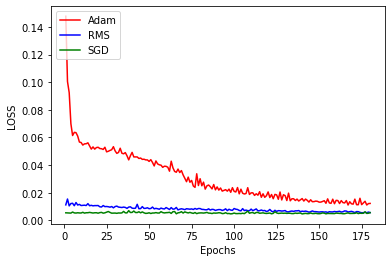

In [18]:
# plot test loss for each optimizer
plt.plot(epochs, val_loss_adam, 'r')
plt.plot(epochs, val_loss_rms, 'b')
plt.plot(epochs, val_loss_sgd, 'g')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['Adam', 'RMS', 'SGD'], loc='upper left')
plt.show()

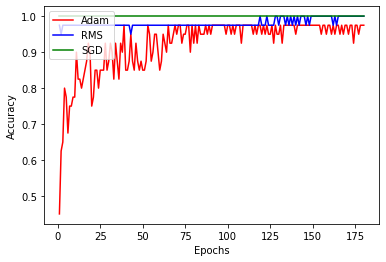

In [19]:
# plot test accuracy for each optimizers
plt.plot(epochs, val_accuracy_adam, 'r')
plt.plot(epochs, val_accuracy_rms, 'b')
plt.plot(epochs, val_accuracy_sgd, 'g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Adam', 'RMS', 'SGD'], loc='upper left')
plt.show()

## We are gonna compare the predictions of each model

In [20]:
# Extract de data of the model
predictions_targets_Adam = model.predict(inputs_test)
predictions_targets_RMS = model_2.predict(inputs_test)
predictions_targets_SGD = model_3.predict(inputs_test)

# We desone hot encoding
predicted_Adam = label_encoder.inverse_transform(predictions_targets_Adam.argmax(1))
predicted_RMS = label_encoder.inverse_transform(predictions_targets_Adam.argmax(1))
predicted_SGD = label_encoder.inverse_transform(predictions_targets_Adam.argmax(1))

In [21]:
# compare them
df = pd.DataFrame({'Predicted Adam':predicted_Adam, 'Predicted RMS': predicted_RMS, 'Predicted SGD':predicted_SGD})
df

,Predicted Adam,Predicted RMS,Predicted SGD
0,2,2,2
1,0,0,0
2,3,3,3
3,1,1,1
4,1,1,1
5,1,1,1
6,3,3,3
7,5,5,5
8,5,5,5
9,2,2,2


## Which we choose?
Comparing the results in the experiments, the predictions and the plots we choose SGD because we see that the acuraccy of prediction is very high and the variations in the graphic are minimum, so this is why we choose it, we also investigate that One interesting and dominant argument about optimizers is that SGD better generalizes than Adam, but Adam converges faster, SGD generalizes better than Adam and thus results in improved final performance. In the experiments belowe also we can see that Adam is working great and dont suffer overfitting or underfitting but comparing it with sgd we can see that with 180 epochs the loss value of sgd keep being much better than adam and the acurracy rate also

ref: https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008

## Now lets check if it have under or overfitting SGD

In [22]:
#We get the data for plotting them
#LOSS
loss = history3.history['loss']
val_loss_sgd = history3.history['val_loss']
#ACCURACY
accuracy= history3.history['categorical_accuracy']
val_accuracy_sgd = history3.history['val_categorical_accuracy']

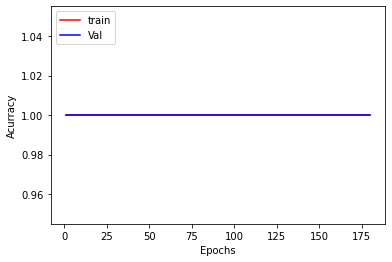

In [23]:
# Compare the acurracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy_sgd, 'b')
plt.xlabel('Epochs')
plt.ylabel('Acurracy')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

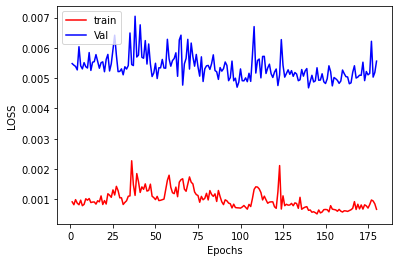

In [24]:
# Compare the loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss_sgd, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

## Now lets check if it have under or overfitting ADAM

In [25]:
#We get the data for plotting them
#LOSS
loss = history.history['loss']
val_loss_Adam = history.history['val_loss']
#ACCURACY
accuracy= history3.history['categorical_accuracy']
val_accuracy_Adam = history.history['val_categorical_accuracy']

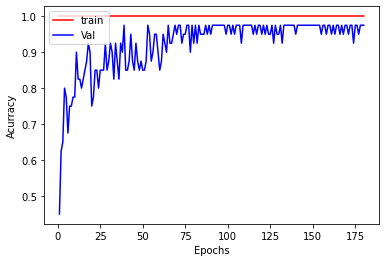

In [26]:
# Compare the acurracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy_Adam, 'b')
plt.xlabel('Epochs')
plt.ylabel('Acurracy')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

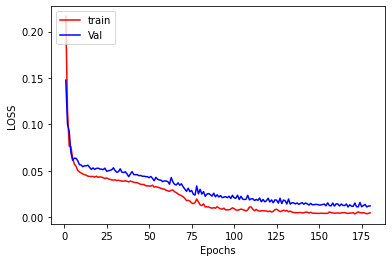

In [27]:
# Compare the loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss_Adam, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

## Save to CSV
For doing that we use the command to csv of pandas.

In [28]:
#We get the data to convert to csv

#df_csv = pd.DataFrame({'Type':predicted_Adam})
#df_csv = pd.DataFrame({'Type':predicted_RMS})
df_csv = pd.DataFrame({'Type':predicted_SGD})

#rename the index
df_csv.index = np.arange(1, 40)

#give a name to the column index
df_csv.index.name='Id'

#We convert the data to csv with his name

#df_csv.to_csv('prediction_adam.csv', index=True)
#df_csv.to_csv('prediction_rms.csv', index=True)
df_csv.to_csv('prediction_sgd.csv', index=True)
df_csv

,Type
Id,
1,2
2,0
3,3
4,1
5,1
6,1
7,3
8,5
9,5
